In [1]:
# Memuat PyTorch dan Parameter lainnya

# Import Pytorch
import torch

# Helper (digunakan untuk pembuatan model)
from torch import nn
from torch.optim import Adam

In [2]:
# Pembuatan dataset, kita akan membuat variable X dan y
# X akan berisi data angka single dimension dari -100 s/d 100 dengan lompatan angka 4
# y akan berisi data seperti X namun masing masing angka di lompat 4 dari index awal
# Contoh : X = -100,-96,-92 ... dan seterusnya
#          y = -96,-92,-88 ... dan seterusnya

X = torch.arange(-100,100,4,dtype=torch.float32).unsqueeze(1)
y = X + 4

Mungkin ada pertanyaan, apa maksud dari code diatas terutama pada bagian unsqueeze(1) ?

pada pytorch format pelatihan model adalah seperti ini : 

> [batch_size,input_size]

unsqueeze ini akan merubah shape dari tensor X dari format 
> [input_size] 

menjadi 
>[batch_size,input_size] 

sehingga data yang telah dibuat bisa dilakukan training oleh pytorch

Mari kita lakukan explorasi data dari data yang telah kita buat

In [3]:
# Melihat apa isi dari variable X
X

tensor([[-100.],
        [ -96.],
        [ -92.],
        [ -88.],
        [ -84.],
        [ -80.],
        [ -76.],
        [ -72.],
        [ -68.],
        [ -64.],
        [ -60.],
        [ -56.],
        [ -52.],
        [ -48.],
        [ -44.],
        [ -40.],
        [ -36.],
        [ -32.],
        [ -28.],
        [ -24.],
        [ -20.],
        [ -16.],
        [ -12.],
        [  -8.],
        [  -4.],
        [   0.],
        [   4.],
        [   8.],
        [  12.],
        [  16.],
        [  20.],
        [  24.],
        [  28.],
        [  32.],
        [  36.],
        [  40.],
        [  44.],
        [  48.],
        [  52.],
        [  56.],
        [  60.],
        [  64.],
        [  68.],
        [  72.],
        [  76.],
        [  80.],
        [  84.],
        [  88.],
        [  92.],
        [  96.]])

bisa dilihat variable X berisi data dari -100 hingga 100 dengan nAngka ke Angka depan memiliki selisih 4

selanjutnya mari kita melihat shape dari X

In [4]:
# Melihat shape X
X.shape

torch.Size([50, 1])

Bisa dilihat format nya sudah sesuai dengan apa yang pytorch harapkan yaitu

> [batch_size,input_size]

dengan batch_size berjumlah 50 dan input size yaitu 1, kita juga bisa melihat data y

In [5]:
# Melihat apa isi data y
y

tensor([[-96.],
        [-92.],
        [-88.],
        [-84.],
        [-80.],
        [-76.],
        [-72.],
        [-68.],
        [-64.],
        [-60.],
        [-56.],
        [-52.],
        [-48.],
        [-44.],
        [-40.],
        [-36.],
        [-32.],
        [-28.],
        [-24.],
        [-20.],
        [-16.],
        [-12.],
        [ -8.],
        [ -4.],
        [  0.],
        [  4.],
        [  8.],
        [ 12.],
        [ 16.],
        [ 20.],
        [ 24.],
        [ 28.],
        [ 32.],
        [ 36.],
        [ 40.],
        [ 44.],
        [ 48.],
        [ 52.],
        [ 56.],
        [ 60.],
        [ 64.],
        [ 68.],
        [ 72.],
        [ 76.],
        [ 80.],
        [ 84.],
        [ 88.],
        [ 92.],
        [ 96.],
        [100.]])

In [6]:
# Melihat shape y 
y.shape

torch.Size([50, 1])

Data secara kasar sudah kita explorasi dan bisa kita lihat, apa sebaiknya kita mulai dengan visualisasi data ?

ada beberapa library visualisasi data, namun yang paling umum digunakan adalah Matplotlib

kita akan menggunakan matplotlib untuk visualisasi data X dan y

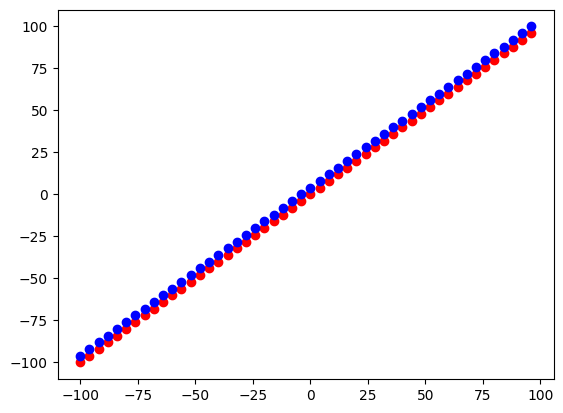

In [7]:
# Import matplotlib
import matplotlib.pyplot as plt

# Lakukan visualisasi data

# Menentukan ukuran (with dan height) kita akan gunakan default saja
plt.figure()

# Membuat Scatter Diagram data X
plt.scatter(X,X,color="red",label="Data X")

# Membuat Scatter Diagram data y
plt.scatter(X,y,color="blue",label="Data y")

# Menampilkan Diagram
plt.show()

Diatas merupakan visualisasi data dari X dan y

Bisa kita lihat X (merah) memulai dari angka -100 dan berakhir di angka -96

Sedangkan y (biru) memulai dari angka -96 dan berakhir di angka 100

Explorasi data ? done

Visualisasi data ? done

Apa selanjutnya ? selanjutnya kita akan membuat model deep learning pertama kita menggunakan pytorch

**Apa yang sebenarnya kita akan buat ? mari kita bahas lebih detail**

kita akan membuat prediksi angka dari angka yang akan kita masukan

- kita sudah membuat urutan angka dari -100 hingga 100 ini disebut X / features
- kita sudah membuat urutan angka dari -96 hingga 100 ini disebut y / labels

X / features adalah angka yang akan kita training dan bandingkan dengan y / labels sehingga mesin komputer dapat mempelajari pola dan membuat prediksi

kita sebagai manusia pasti akan langsung menyadari jika kita menambahkan data angka 100 di X / features 

maka y / labels akan menciptakan angka 104 karna pola nya adalah angka ditambah 4

kita akan membuat model pertama kita,melakukan training dan melakukan prediksi pada model yang telah dibuat apakah prediksi nya sudah akurat atau belum

In [8]:
# Membuat Model pertama kita

class ModelPertama(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1) # input = 1 , output = 1 karna kita akan melakukan prediksi dengan 1 angka input dan output 1 angka
    def forward(self,x):
        return self.linear(x)

model = ModelPertama()
print(model)

ModelPertama(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


Selamat kamu telah berhasil membuat model pertama kamu

bisa dilihat model yang dibuat sangat sederhana dengan 1 layer saja
1 input dan 1 output

Kita akan melakukan training pada model yang telah dibuat

In [9]:
# Menentukan Loss Function, kita akan menggunakan MAE (Mean Absolute Error) untuk loss 
loss_fn = nn.L1Loss()

# Menggunakan Optimizer adam dengan learning rate 0.01 atau 1e-2
optimizer = Adam(model.parameters(),lr=0.01)

In [10]:
# Melakukan Training Model
# Konsep pytorch yaitu Training Loop

# Epochs adalah lap seperti balapan, jadi 10 epochs adalah mesin akan belajar 10 kali begitupun seterusnya
# Apakah epochs ada limit ? tidak 

number_epochs = 5
print("Training dimulai")

# Training Model
for epoch in range(number_epochs):
    model.train()
    prediction = model(X)
    loss = loss_fn(prediction,y)
    
    # Backward pass dan optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch + 1} dengan Loss : {loss.item():.4f}")

Training dimulai
Epoch 1 dengan Loss : 64.8194
Epoch 2 dengan Loss : 64.3194
Epoch 3 dengan Loss : 63.8194
Epoch 4 dengan Loss : 63.3194
Epoch 5 dengan Loss : 62.8194


Training sudah berhasil dengan MAE / Loss 62.8

harus diperhatikan saat menggunakan Loss MAE maka semakin kecil angka nya (mendekati angka 0) semakin baik

dari model yang telah kita buat diatas sepertinya akurasinya masih sangat buruk, namun mari kita lakukan prediksi dengan model yang telah kita buat

kita akan menggunakan angka 100

jadi seharusnya prediksi yang muncul adalah 104 karna sesuai pola yang telah kita tahu angka ditambah 4

In [12]:
# Melakukan prediksi dari model yang telah dibuat

model.eval()
with torch.no_grad():
    test_angka = torch.tensor([[100.0]])
    hasil_prediksi = model(test_angka)
    print(f'Hasil prediksi: {hasil_prediksi.item():.4f}') 

Hasil prediksi: -24.5200


Bisa dilihat dari prediksi menunjukan angka -24

ternyata model yang kita buat masih buruk, apakah ada cara agar model bisa memprediksi dengan sempurna ?

ada beberapa cara yang bisa dilakukan diantaranya

- menambahkan epochs (kita akan menggunakan ini)
- menambahkan layer pada model
- menggunakan optimizer berbeda
- menggunakan learning rate / lr berbeda
- menambahkan regulation
- dan masih banyak lagi

namun untuk kasus mencoba optimize model yang telah kita buat kita akan mencoba dengan cara menambahkan epochs, jadi mesin bisa belajar lebih lama agar mendapatkan hasil yang maksimal

In [13]:
# Kita akan melakukan 1000 epochs

number_epochs = 1000
print("Training dimulai")

# Training Model
for epoch in range(number_epochs):
    model.train()
    prediction = model(X)
    loss = loss_fn(prediction,y)
    
    # Backward pass dan optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Agar print tidak terlalu banyak kita akan menampilkan print per 100
    
    if epoch % 100 == 0:    
        print(f"Epoch {epoch} dengan Loss : {loss.item():.4f}")

Training dimulai
Epoch 0 dengan Loss : 62.3194
Epoch 100 dengan Loss : 12.4978
Epoch 200 dengan Loss : 0.8788
Epoch 300 dengan Loss : 0.1012
Epoch 400 dengan Loss : 0.0900
Epoch 500 dengan Loss : 0.0839
Epoch 600 dengan Loss : 0.0806
Epoch 700 dengan Loss : 0.0785
Epoch 800 dengan Loss : 0.0771
Epoch 900 dengan Loss : 0.0760


Wow, MAE dari model yang telah kita buat berkurang drastis dan hampir mendekati angka 0, mari kita lakukan prediksi dengan model yang telah diperbarui apakah sudah sesuai atau belum

In [14]:
# Melakukan prediksi dari model yang telah dibuat

model.eval()
with torch.no_grad():
    test_angka = torch.tensor([[100.0]])
    hasil_prediksi = model(test_angka)
    print(f'Hasil prediksi: {hasil_prediksi.item():.4f}') 
    print(f'Angka seharusnya: 104') 

Hasil prediksi: 104.1504
Angka seharusnya: 104


Dengan penyesuaian sederhana kita sudah membuat model yang cukup optimal

kalian bisa kreasikan dengan menambahkan layer lagi dan lain lain